In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

1. Вывести информацию о наборе данных.

In [ ]:
df = pd.read_csv('Исходные данные.csv')
df.info()
df

<ipython-input-3-e69959925b40>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Исходные данные.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


2. Определить наличие ошибочных записей в признаках.
Исправить ошибочные записи, либо заменить ошибочные записи пропусками.


In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

4. Для всех вариантов преобразовать признак "Credit_History_Age" в числовой формат (месяцы).


In [ ]:
def convert_to_months(credit_history_age):
    if pd.isna(credit_history_age):
        return np.nan
    years, months = 0, 0
    if 'Years' in credit_history_age:
        years = int(credit_history_age.split(' Years')[0])
    if 'Months' in credit_history_age:
        months = int(credit_history_age.split('and ')[-1].split(' Months')[0])
    return years * 12 + months

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

print(df[['Credit_History_Age']].head())


   Credit_History_Age
0               265.0
1                 NaN
2               267.0
3               268.0
4               269.0


5. Определить наличие аномальных значений, которые не соответствуют физической природе признаков.

In [ ]:
anomaly = 20
df.loc[(df['Num_Credit_Card'] > anomaly) | (df['Num_Credit_Card'] < 0), 'Num_Credit_Card'] = np.nan
print(df['Num_Credit_Card'].isna().sum())

df['Num_Credit_Card'].unique().tolist()

2263


[4.0,
 nan,
 5.0,
 1.0,
 7.0,
 6.0,
 8.0,
 3.0,
 9.0,
 2.0,
 10.0,
 11.0,
 0.0,
 17.0,
 15.0,
 18.0,
 16.0,
 20.0]

6.Восстановить пропущенные значения признаков Payment_Behaviour, Credit_History_Age. Сравнить распределения признака до и после восстановления.
Для всех вариантов восстановить пропущенные значения признака Type_of_Loan.


In [ ]:
df1 = df.copy()

df1['Payment_Behaviour'].fillna(df1['Payment_Behaviour'].dropna().mode()[0], inplace = True)

df1['Payment_Behaviour'].isna().sum()

0

In [ ]:
print(f"Пропуски в 'Credit_History_Age' до замены: {df1['Credit_History_Age'].isna().sum()}")

df1[['Credit_History_Age']].head(10)

Пропуски в 'Credit_History_Age' до замены: 100000


,Credit_History_Age
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [1]:
print(f"Пропуски в 'Credit_History_Age' до замены: {df1['Credit_History_Age'].isna().sum()}")

df1[['Credit_History_Age']].head(10)

zamena = dict()

# Замена недопустимых значений на NaN
for i in df['Credit_History_Age']:
    if i is not np.nan and '_' in str(i):
        zamena[i] = np.nan
zamena

df1 = df1.replace({'Credit_History_Age': zamena})
print(f"Пропуски в 'Credit_History_Age' после замены: {df1['Credit_History_Age'].isna().sum()}")

df1['Credit_History_Age'] = pd.to_numeric(df1['Credit_History_Age'], errors='coerce')
# Округление значений до 0 знаков после запятой
df1['Credit_History_Age'] = np.round(df1['Credit_History_Age'], decimals=0)

print(df1[['Credit_History_Age']].head(5))

CHA = df1['Credit_History_Age']
sub = [CHA[i:i + 8] for i in range(0, len(CHA), 8)]

for i in range(len(sub)):
    if sub[i].isna().sum() == 8:
        print(sub[i])
    else:
        median = sub[i].median()
        sub[i] = sub[i].apply(lambda x: median if pd.isna(x) else x)

CHA_zam = pd.concat(sub, ignore_index=True)
CHA = CHA.dropna()
print(f"Длина данных до замены пропусков: {len(CHA)}, после замены: {len(CHA_zam)}")

df1['Credit_History_Age'] = CHA_zam

CHA_uniq, CHA_freq = np.unique(CHA, return_counts=True)
CHA_zam_uniq, CHA_zam_freq = np.unique(CHA_zam, return_counts=True)

CHA_epmf = (CHA_freq / len(CHA)).round(3)
CHA_zam_epmf = (CHA_zam_freq / len(CHA_zam)).round(3)

plt.figure(figsize=(20, 10))

# График до замены пропусков
plt.subplot(2, 1, 1)
plt.plot(CHA_uniq, CHA_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(CHA_uniq, 0, CHA_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей до замены пропусков')
plt.xlabel('Возраст кредитной истории')
plt.ylabel('Вероятность')
plt.ylim(0)
plt.legend()
plt.grid()

# График после замены пропусков
plt.subplot(2, 1, 2)
plt.plot(CHA_zam_uniq, CHA_zam_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(CHA_zam_uniq, 0, CHA_zam_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей после замены пропусков')
plt.xlabel('Возраст кредитной истории')
plt.ylabel('Вероятность')
plt.ylim(0)
plt.legend()
plt.grid()

plt.show()

NameError: name 'df1' is not defined

In [ ]:
df1['Type_of_Loan']
df1['Type_of_Loan'].fillna(df1['Type_of_Loan'].dropna().mode()[0], inplace = True)
df1['Type_of_Loan'].isna().sum()


0

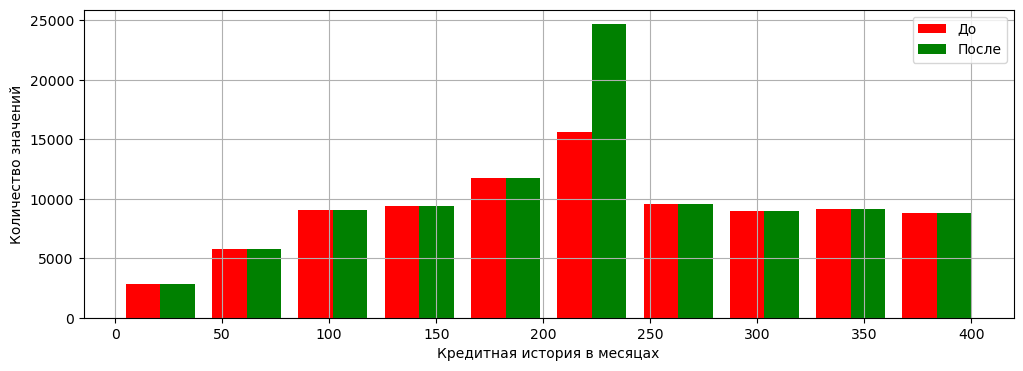

In [ ]:
plt.figure(figsize = (12, 4))

plt.hist([df['Credit_History_Age'],  df1['Credit_History_Age']], bins = 10, color = ['r', 'g'], label = ['До', 'После'])

plt.xlabel('Кредитная история в месяцах')
plt.ylabel('Количество значений')

plt.legend()
plt.grid()

7. Определить наличие статистических выбросов.
Использовать графический и статистический методы.

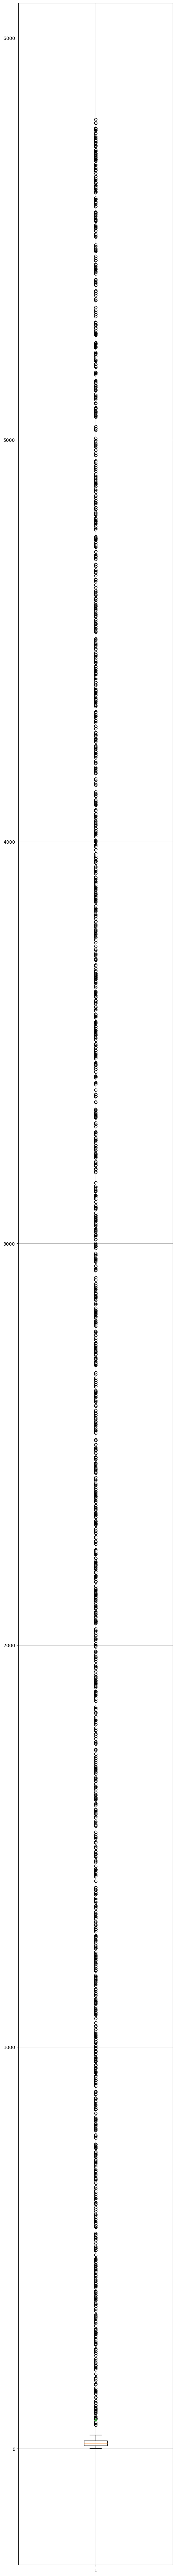

In [ ]:
df1['Interest_Rate']

plt.figure(figsize = (6, 100))

plt.boxplot(df1['Interest_Rate'].dropna(), showmeans = True, whis = 1.5)

plt.grid()

In [ ]:
Q1 = df['Interest_Rate'].quantile(0.25)
Q3 = df['Interest_Rate'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

iqr_outliers = df1[(df['Interest_Rate'] < lower_bound) | (df1['Interest_Rate'] > upper_bound)]

iqr_outliers['Interest_Rate'].describe()

count    2034.000000
mean     2862.832350
std      1656.936344
min        59.000000
25%      1384.000000
50%      2822.500000
75%      4281.000000
max      5797.000000
Name: Interest_Rate, dtype: float64

8. Закодировать категориальные признаки.

In [ ]:
df1 = df.copy()
df['Payment_of_Min_Amount'].unique()

df1 = df1.astype({'Payment_of_Min_Amount' : 'category'})

df1['Payment_of_Min_Amount'] = df1['Payment_of_Min_Amount'].cat.codes
df1['Payment_of_Min_Amount']

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Payment_of_Min_Amount, Length: 100000, dtype: int8

9. Определить эмпирическое распределение признака, подобрать теоретическое распределение и оценить степень их близости.


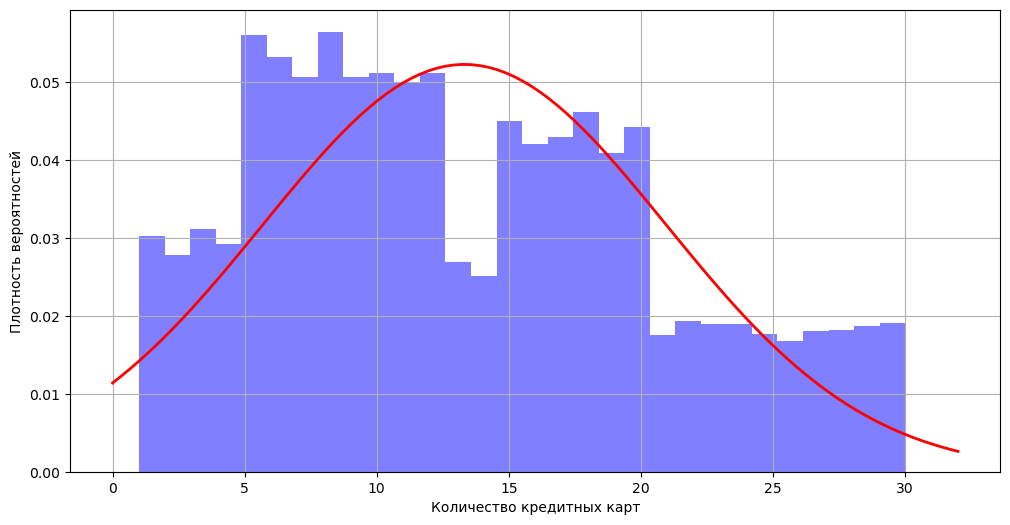

In [ ]:
df_Interest_Rate = df.copy()

anomaly2 = 30
df_Interest_Rate.loc[(df_Interest_Rate['Interest_Rate'] > anomaly2) | (df_Interest_Rate['Interest_Rate'] < 0), 'Interest_Rate'] = np.nan

CUR = df_Interest_Rate['Interest_Rate'].copy()
CUR = CUR.dropna()
CUR.mean(), CUR.std()

norm_rv = sts.norm(loc=13.32, scale=7.63)
x = np.linspace(0, 32, 100)
norm_pdf = norm_rv.pdf(x)
norm_pdf[:10]

plt.figure(figsize=(12,6))
plt.hist(CUR, color='b', bins = 30, density=True, alpha = 0.5)
plt.plot(x, norm_pdf, color='r', lw=2)
plt.xlabel('Количество кредитных карт')
plt.ylabel('Плотность вероятностей')
plt.grid()
plt.show()


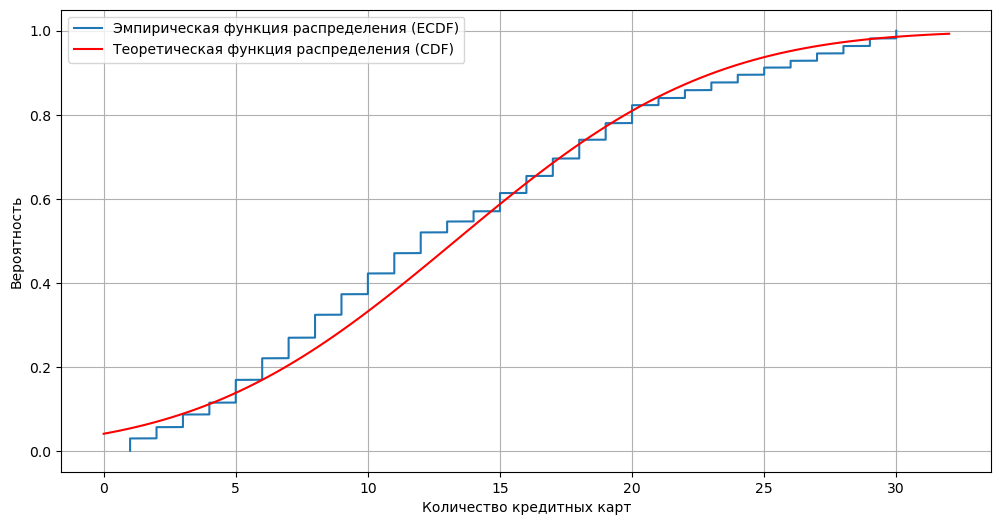

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(12, 6))
ecdf = ECDF(CUR)
plt.plot(ecdf.x, ecdf.y, label='Эмпирическая функция распределения (ECDF)')
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, color='r', label='Теоретическая функция распределения (CDF)')
plt.xlabel('Количество кредитных карт')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()

10. Выбрать любые два количественных признака и оценить наличие и степень их зависимости.
Провести визуальный анализ зависимости. Сделать вывод.
Написать функции для расчета коэффициента корреляции Пирсона, Спирмена, Кендалла.
Вычислить требуемые коэффициенты с использованием написанных функций и встроенных средств Python. Сделать вывод.


In [ ]:
df2 = df2[['Monthly_Inhand_Salary', 'Amount_invested_monthly']].copy()

df2['Amount_invested_monthly'] = pd.to_numeric(df2['Amount_invested_monthly'], errors='coerce')
df2 = df2.dropna().reset_index(drop=True)
df2['Amount_invested_monthly'].dtypes
df2.round(0)

,Monthly_Inhand_Salary,Amount_invested_monthly
0,1825.0,80.0
1,1825.0,41.0
2,1825.0,178.0
3,1825.0,25.0
4,3038.0,104.0
...,...,...
77574,3359.0,61.0
77575,3359.0,54.0
77576,3359.0,24.0
77577,3359.0,252.0


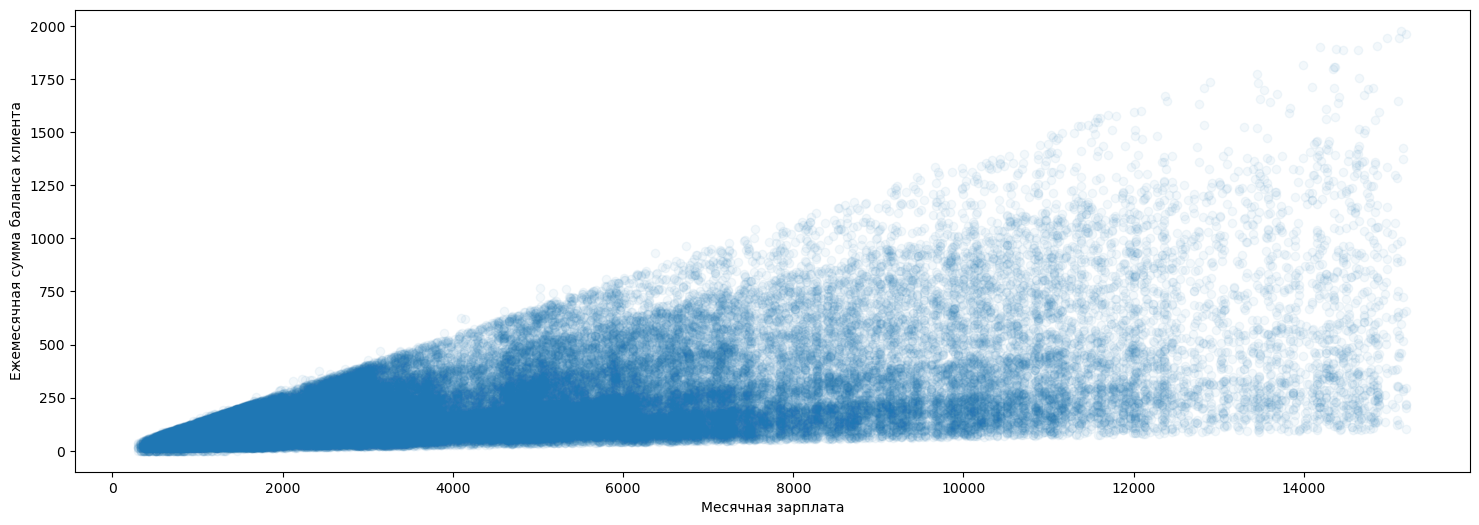

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(df2['Monthly_Inhand_Salary'], df2['Amount_invested_monthly'], alpha = 0.05)
plt.xlabel('Месячная зарплата')
plt.ylabel('Ежемесячная сумма баланса клиента')
plt.show()

In [ ]:

df2 = df.dropna(subset=['Monthly_Inhand_Salary', 'Amount_invested_monthly'])

def pearson_correlation(x, y):
  n = len(x)
  # Вычисляем средние значения x и y
  mean_x = np.mean(x)
  mean_y = np.mean(y)

  # Вычисляем числитель и знаменатель
  numerator = np.sum((x - mean_x) * (y - mean_y))

  denominator = np.sqrt(np.sum((x - mean_x) ** 2) * np.sum((y - mean_y) ** 2))

  # Вычисляем коэффициент корреляции
  r = numerator / denominator

  return r

def spearman_correlation(x, y):
  # Получаем ранг значений в массиве x
  rank_x = pd.Series(x).rank().values
  # Получаем ранг значений в массиве y
  rank_y = pd.Series(y).rank().values
  # Возвращаем коэффициент корреляции Спирмена - коэффициент корреляции Пирсона по рангам
  return pearson_correlation(rank_x, rank_y)

def kendall_tau(x, y):
    n = len(x)
    concordant = 0
    discordant = 0

    for i in range(n):
        for j in range(i+1, n):
            if (x[i] - x[j]) * (y[i] - y[j]) > 0:
                concordant += 1
            elif (x[i] - x[j]) * (y[i] - y[j]) < 0:
                discordant += 1

    tau = (concordant - discordant) / (n * (n - 1) / 2)
    return tau

kendall_corr = kendall_tau(df2['Amount_invested_monthly'][:3000].values, df2['Monthly_Inhand_Salary'][:3000].values)
pearson_corr = pearson_correlation(df2['Monthly_Inhand_Salary'], df2['Amount_invested_monthly'])
spearman_corr = spearman_correlation(df2['Monthly_Inhand_Salary'], df2['Amount_invested_monthly'])

pearson_corr_builtin = df2['Monthly_Inhand_Salary'].corr(df2['Amount_invested_monthly'], method='pearson')
spearman_corr_builtin = df2['Monthly_Inhand_Salary'[::10]].corr(df2['Amount_invested_monthly'][::10], method='spearman')
kendall_corr_builtin = df2['Monthly_Inhand_Salary'][:3000].corr(df2['Amount_invested_monthly'][:3000], method='kendall')

print("Коэффициент корреляции Пирсона (функция):", pearson_corr)
print("Коэффициент корреляции Пирсона (встроенный):", pearson_corr_builtin)
print("Коэффициент корреляции Спирмена (функция):", spearman_corr)
print("Коэффициент корреляции Спирмена (встроенный):", spearman_corr_builtin)
print("Коэффициент корреляции Кендалла (функция):", kendall_corr)
print("Коэффициент корреляции Кендалла (встроенный):", kendall_corr_builtin)

Вывод основе функций: Все три коэффициента корреляции показывают положительную зависимость между двумя количественными признаками, что указывает на то, что увеличение одного признака связано с увеличением другого признака.
Вывод на основе графика: На графике видно, что существует положительная зависимость между месячной зарплатой и ежемесячной суммой, инвестированной клиентом. Что значит, что с увеличением месячной зарплаты увеличивается и сумма инвестиций.



11. Выбрать любой количественный и категориальный (с 3-мя и более категориями) признаки и оценить наличие и степень их зависимости. Использовать графический метод и показатели зависимости.
Провести визуальный анализ на основе сравнения гистограмм, графиков функций распределения, графиков "ящик с усами". Сделать вывод.
Написать функцию для расчета корреляционного отношения.
Вычислить корреляционное отношение с использованием написанной функции. Сделать вывод.


In [ ]:
df1 = df.copy()
df1 = df1.dropna(subset=['Payment_Behaviour', 'Monthly_Inhand_Salary'])
df1['Monthly_Inhand_Salary'] = df1['Monthly_Inhand_Salary'].round(0)

In [ ]:
salary = df1['Monthly_Inhand_Salary']
salary_uniq, salary_freq = np.unique(salary, return_counts=True)
salary_epmf = (salary_freq / len(salary)).round(6)
salary_epmf

array([8.90e-05, 7.60e-05, 1.53e-04, ..., 8.90e-05, 8.90e-05, 8.90e-05])

In [ ]:
PM_uniq, PM_freq = np.unique(df1['Payment_Behaviour'], return_counts=True)
PM_epmf = (PM_freq / len(df1['Payment_Behaviour'])).round(3)
print(PM_uniq)
print(PM_freq)
print(PM_epmf)

['High_spent_Large_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments']
[11630 14936  9664  8816 11735 21777]
[0.148 0.19  0.123 0.112 0.149 0.277]


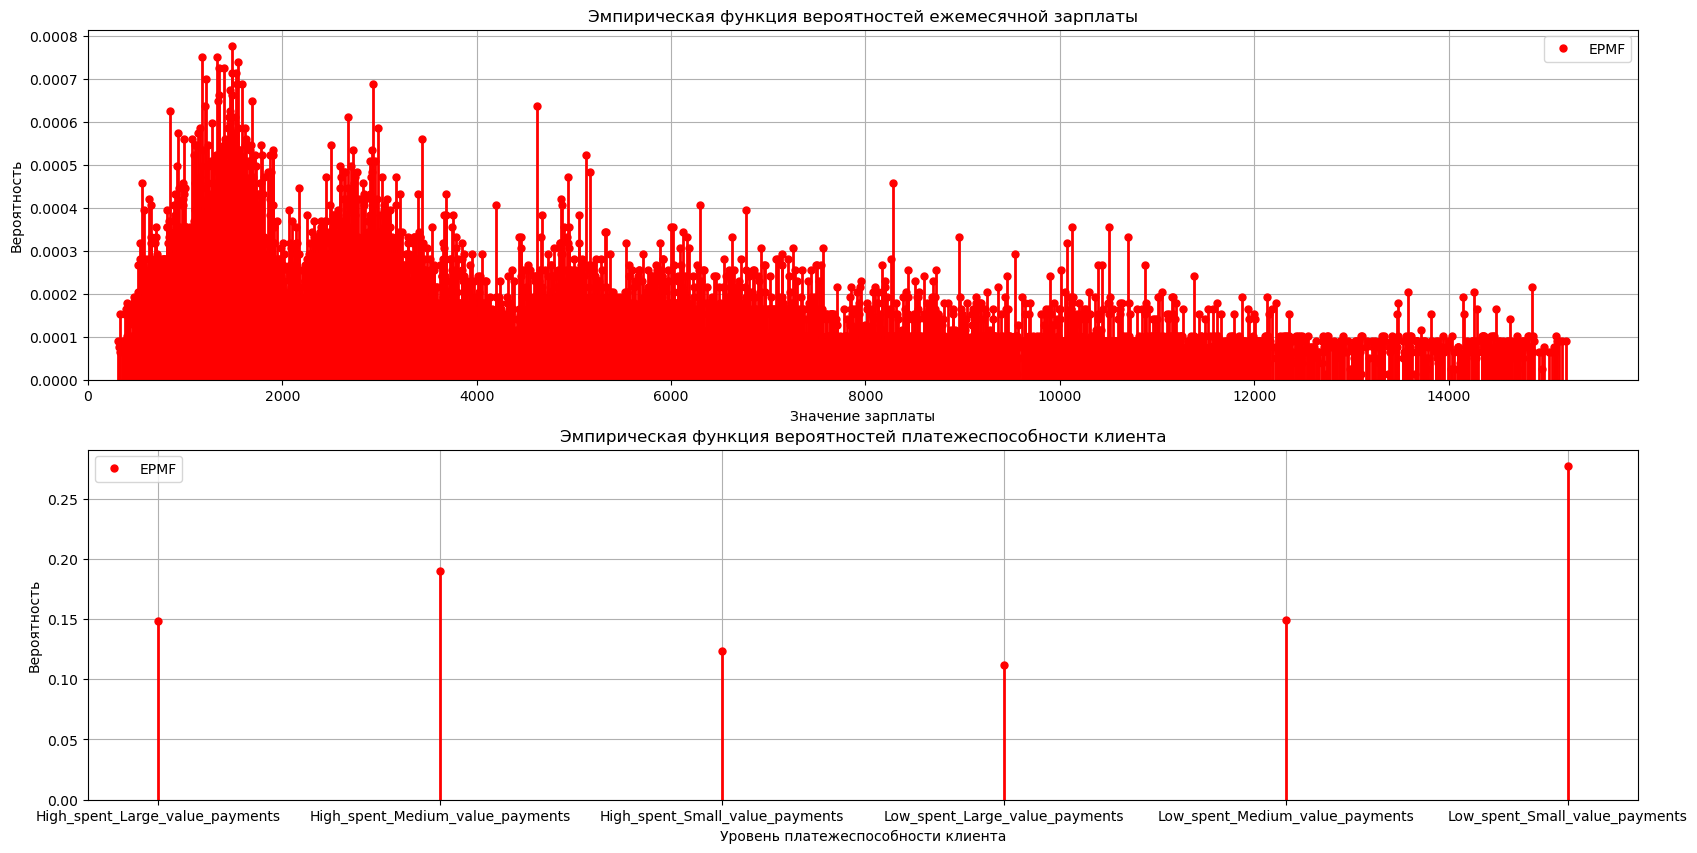

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.plot(salary_uniq, salary_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(salary_uniq, 0, salary_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей ежемесячной зарплаты')
plt.xlabel('Значение зарплаты')
plt.ylabel('Вероятность')
plt.legend()
plt.ylim(0)
plt.xlim(0)

plt.grid()

plt.subplot(2, 1, 2)
plt.plot(PM_uniq, PM_epmf, 'ro', ms=5, label='EPMF')
plt.vlines(PM_uniq, 0, PM_epmf, colors='r', lw=2)
plt.title('Эмпирическая функция вероятностей платежеспособности клиента')
plt.xlabel('Уровень платежеспособности клиента')
plt.ylabel('Вероятность')
plt.ylim(0)
plt.legend()
plt.grid()

plt.show()

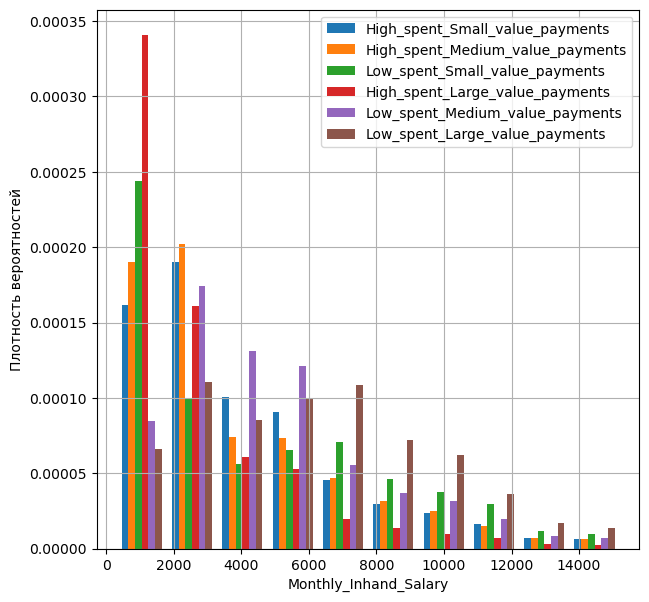

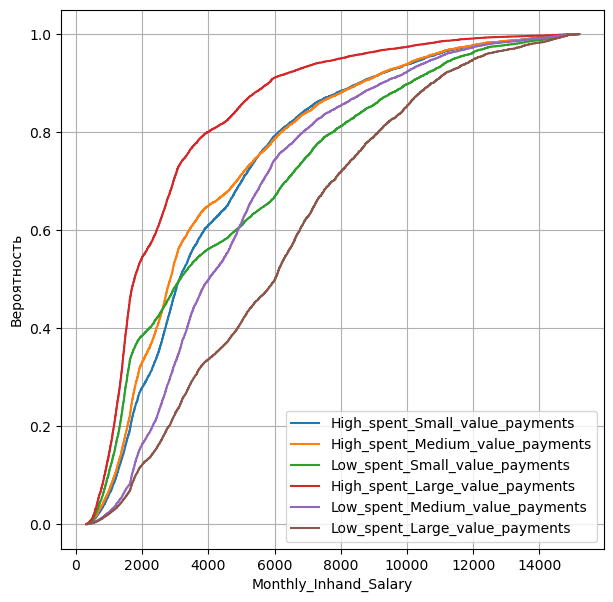

In [ ]:
plt.figure(figsize=(7, 7))
df1_High_spent_Small_value_payments = df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'High_spent_Small_value_payments']
df1_Low_spent_Large_value_payments = df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'Low_spent_Large_value_payments']
df1_Low_spent_Medium_value_payments = df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'Low_spent_Medium_value_payments']
df1_Low_spent_Small_value_payments = df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'Low_spent_Small_value_payments']
df1_High_spent_Medium_value_payments = df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'High_spent_Medium_value_payments']
df_High_spent_Large_value_payments = df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'High_spent_Large_value_payments']


plt.hist([df1_High_spent_Small_value_payments, df1_Low_spent_Large_value_payments, df1_Low_spent_Medium_value_payments, df1_Low_spent_Small_value_payments, df1_High_spent_Medium_value_payments, df_High_spent_Large_value_payments], bins=10, density=True)

plt.ylabel('Плотность вероятностей')

plt.xlabel('Monthly_Inhand_Salary')

plt.legend(df1['Payment_Behaviour'].unique())

plt.grid()

ecdf_High_spent_Small_value_payments= ECDF(df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'High_spent_Small_value_payments'])
ecdf_Low_spent_Large_value_payments = ECDF(df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'Low_spent_Large_value_payments'])
ecdf_Low_spent_Medium_value_payments = ECDF(df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'Low_spent_Medium_value_payments'])
ecdf_Low_spent_Small_value_payments = ECDF(df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'Low_spent_Small_value_payments'])
ecdf_High_spent_Medium_value_payments = ECDF(df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'High_spent_Medium_value_payments'])
ecdf_High_spent_Large_value_payments = ECDF(df1['Monthly_Inhand_Salary'][df1['Payment_Behaviour'] == 'High_spent_Large_value_payments'])

plt.figure(figsize = (7, 7))

plt.step(ecdf_High_spent_Small_value_payments.x, ecdf_High_spent_Small_value_payments.y)
plt.step(ecdf_Low_spent_Large_value_payments.x, ecdf_Low_spent_Large_value_payments.y)
plt.step(ecdf_Low_spent_Medium_value_payments.x, ecdf_Low_spent_Medium_value_payments.y)
plt.step(ecdf_Low_spent_Small_value_payments.x, ecdf_Low_spent_Small_value_payments.y)
plt.step(ecdf_High_spent_Medium_value_payments.x, ecdf_High_spent_Medium_value_payments.y)
plt.step(ecdf_High_spent_Large_value_payments.x, ecdf_High_spent_Large_value_payments.y)

plt.ylabel('Вероятность')
plt.xlabel('Monthly_Inhand_Salary')
plt.legend(df1['Payment_Behaviour'].unique())
plt.grid()

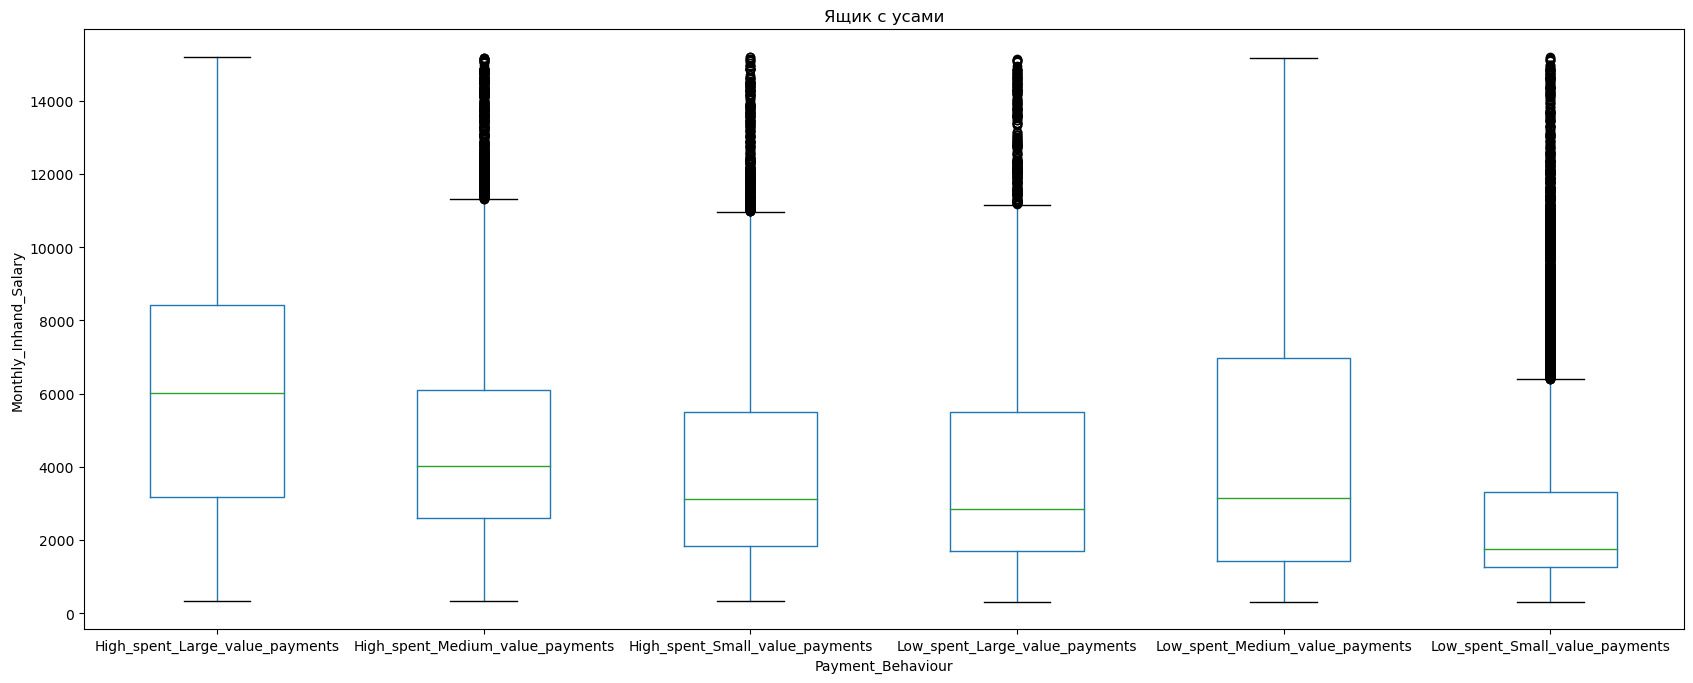

In [ ]:
df1.boxplot(column='Monthly_Inhand_Salary', by='Payment_Behaviour', grid=False, figsize=(20, 8))
plt.title('Ящик c усами')
plt.suptitle('')
plt.xlabel('Payment_Behaviour')
plt.ylabel('Monthly_Inhand_Salary')
plt.show()

In [ ]:
def correlation_ratio(categories, measurements):

    categories = np.array(categories)
    measurements = np.array(measurements)

    # Получаем уникальные категории
    unique_categories = np.unique(categories)

    # Рассчитываем общее среднее
    overall_mean = np.mean(measurements)

    # Рассчитываем числитель
    numerator = 0
    for category in unique_categories:
        category_measurements = measurements[categories == category]
        category_mean = np.mean(category_measurements)
        numerator += len(category_measurements) * (category_mean - overall_mean) ** 2

    # Рассчитываем знаменатель
    denominator = np.sum((measurements - overall_mean) ** 2)

    # Корреляционное отношение
    eta = np.sqrt(numerator / denominator)

    return eta

print(correlation_ratio(df1['Payment_Behaviour'], df1['Monthly_Inhand_Salary']))


0.34225348024737523


**Вывод на основе корреляционного отношения:**

Значение 0.342 говорит о том, что между двумя признаками присутствует умеренная зависимость. Это означает, что знание значения одного признака дает некоторую информацию о значении другого признака, но эта информация не является достаточно полной.


**Вывод на основе графика:**

*   Все категории показывают значительное накопление вероятностей в низком диапазоне зарплат (0-4000).
*   Категории с высокими значениями платежей имеют более равномерное распределение зарплат по всему диапазону.
*   High_spent_Large_value_payments и Low_spent_Large_value_payments имеют более пологие кривые, что указывает на более высокие зарплаты в этих категориях.


12. Выбрать любые два категориальных признака и оценить наличие и степень их зависимости. Провести визуальный анализ зависимости. Сделать вывод. Написать функции для расчета коэффициента ассоциации, коэффициента контингенции, коэффициента взаимной сопряженности Чупрова, коэффициента взаимной сопряженности Пирсона. Вычислить требуемые коэффициенты с использованием написанных функций. Сделать вывод.

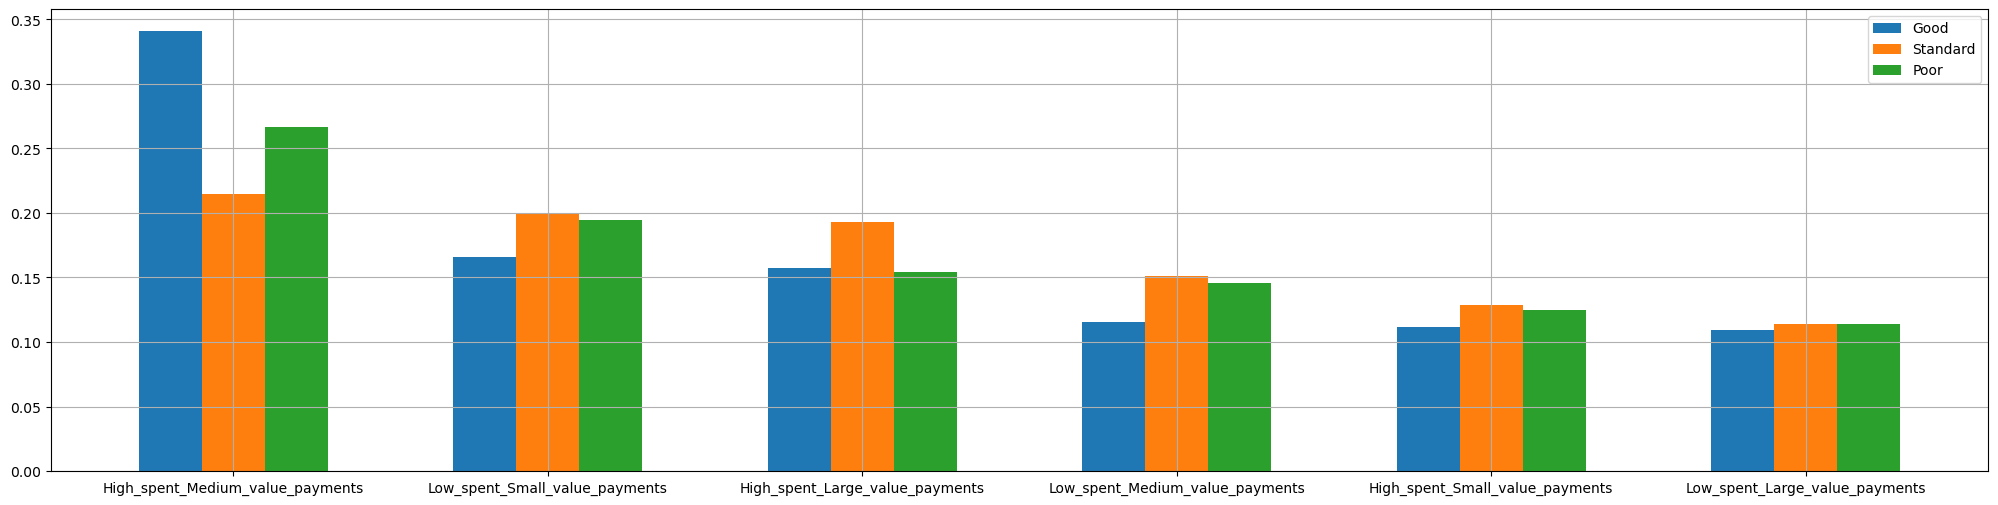

In [ ]:
from scipy.stats import chi2_contingency

df['Payment_Behaviour']
df['Credit_Score'].unique()
df2 = df[['Payment_Behaviour', 'Credit_Score']].copy()

df2 = df2.dropna().reset_index(drop = True)

df2 = df2.astype('category')

good = df2['Payment_Behaviour'][df2['Credit_Score'] == 'Good'].value_counts(normalize = True)
poor = df2['Payment_Behaviour'][df2['Credit_Score'] == 'Poor'].value_counts(normalize = True)
stan = df2['Payment_Behaviour'][df2['Credit_Score'] == 'Standard'].value_counts(normalize = True)


plt.figure(figsize = (25, 6))
x = np.arange(len(good.index))
w = 0.2
plt.bar(x - w, poor.values, width = w)
plt.bar(x, good.values, width = w)
plt.bar(x + w, stan.values, width = w)

plt.legend(df2['Credit_Score'].unique())
plt.xticks(x, good.index)
plt.grid()



In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(crtab1, annot=True, fmt='d', cmap='coolwarm')
plt.title('Payment_Behaviour vs Credit_Score')
plt.ylabel('Payment_Behaviour')
plt.xlabel('Credit_Score')
plt.show()

NameError: name 'crtab1' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
df['Credit_Score'].unique()

crtab1 = pd.crosstab(index = df2['Credit_Score'], columns = df2['Payment_Behaviour'])
chi2 = chi2_contingency(crtab1)[0]

matrix = crtab1.values.tolist()
matrix

def fun1(matrix):

    N = sum(sum(row) for row in matrix)

    row_sums = [sum(row) for row in matrix]
    col_sums = [sum(column) for column in zip(*matrix)]

    numerator = N * sum(a * b / N for row, col in zip(matrix, zip(*matrix)) for a, b in zip(row, col)) - sum(a * b for a, b in zip(row_sums, col_sums))

    sum_row_squared = sum(a ** 2 for a in row_sums)
    sum_col_squared = sum(a ** 2 for a in col_sums)
    denominator = (sum_row_squared - N) ** 0.5 * (sum_col_squared - N) ** 0.5

    return numerator / denominator
print('Коэффициент ассоциации:', fun1(matrix))

def fun2(x):

    N = sum(sum(row) for row in matrix)

    row_sums = [sum(row) for row in matrix]
    col_sums = [sum(column) for column in zip(*matrix)]

    expected = [[a * b / N for b in col_sums] for a in row_sums]

    chi_2 = sum((a - b) ** 2 / b for row, col in zip(matrix, expected) for a, b in zip(row, col))

    return (chi_2 / (N + chi_2)) ** 0.5
print('Коэффициент континенции:', fun2(matrix))

def fun3(x, y):
  chi2 = chi2_contingency(x)[0]
  return np.sqrt(chi2 / (chi2 + len(y)))

# Вызов функции с таблицей сопряженности и DataFrame
print('Коэффициент взаимной сопряженности Пирсона:', fun3(crtab1, df))

def fun4(x, y):
  n = len(y)
  kch = np.sqrt(chi2 / n * np.sqrt((x.shape[0]-1) * (x.shape[1]-1)))
  return kch
print('Коэффициент взаимной сопряженности Чупрова:', fun4(crtab1, df))





Коэффициент ассоциации: -0.46326586158580385
Коэффициент континенции: 0.12347819961053329
Коэффициент взаимной сопряженности Пирсона: 0.11876214748401523
Коэффициент взаимной сопряженности Чупрова: 0.2126975994122805


На основании полученных коэффициентов взаимной сопряженности можно сделать следующий вывод о наличии и степени зависимости между двумя категориальными признаками:

Слабая зависимость, большинство коэффициентов указывают на очень слабую зависимость между двумя категориальными признаками, так как их значения равны около 0.1.

Коэффициент ассоциации и коэффициент контингенции расчитать не представилось возможным, так как для этого необходимо два признака с двумя возможныит значениями.